# PQN #006: Visualize The Trend With Pandas Rolling Statistics
https://pyquantnews.com/pqn-006-visualize-the-trend-with-pandas-rolling/

## Step 1: Get the data

In [1]:
%matplotlib inline

import yfinance as yf

In [14]:
data = yf.download('QQQ', start="2020-01-01", end="2022-06-30")   # NFLX

[*********************100%***********************]  1 of 1 completed


## Step 2: Define the function for z-score
The z-score is the number of standard deviations a value is away from it's mean. It’s a great way to summarize where a value lies on a distribution.

For example, if you’re 189 cm tall, the z-score of your height might be 2.5. That means you are 2.5 standard deviations away from the mean height of everyone in the distribution.

The math is simple:

    (value - average value) / standard deviation of values

In [15]:
def z_score(chunk):
    # This function accepts a chunk of data. Then it takes the last value from the chunk, 
    # subtracts the mean (average), and divides by the standard deviation.
    return (chunk[-1] - chunk.mean()) / chunk.std()  # The [-1] means “take the last value from the chunk”.

## Step 3: Create the rolling statistic
Creating the rolling z-score is one line of code using pandas.

<AxesSubplot:xlabel='Date'>

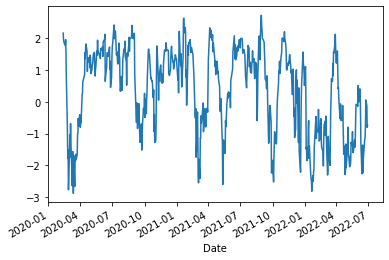

In [18]:
# We use the closing price and apply the rolling function to it. 
# The job of rolling is to take 30 rows of data and apply the z_score function to those rows. 
# Then move forward one row, and do it again.
rolled = data.Close.rolling(window=30).apply(z_score)

# Now we can plot the z-score over time.
rolled.plot()

<AxesSubplot:>

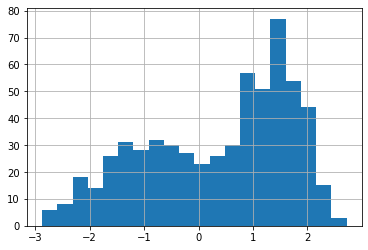

In [19]:
# And as a histogram.
rolled.hist(bins=20)

You can see a large negative z-score of -4.4. This is a -4.4 standard deviation move in the stock price! It corresponds to the -35% drop in NFLX on 20 April 2022.

## Step 4: Rolling minimum return
Let’s take a look at the largest percentage drop over a rolling 30 day period.

<AxesSubplot:xlabel='Date'>

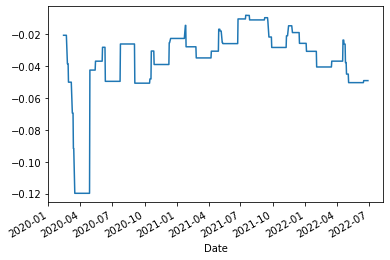

In [21]:
min_pct_change = (
    data
    .Close
    .pct_change()
    .rolling(window=30)
    .min()
)

# Here, we calculate the daily percentage change on the closing price. Then we apply the min function to the rolling window of data.

# Here’s the plot.
min_pct_change.plot()

<AxesSubplot:>

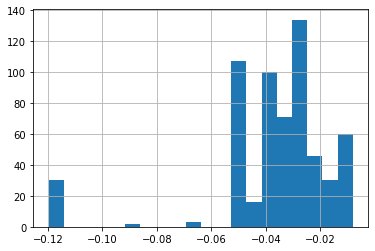

In [22]:
# And the histogram.
min_pct_change.hist(bins=20)

You can see Netflix has had a couple pretty bad days!